#  A2: Smiling Classifier - Random Forest vs Support Vector Machine vs Logistic Regression

# Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split

import time

In [3]:
import Tools as Tool
import warnings
warnings.filterwarnings("ignore")

In [4]:
# split data into training set and validation set
X_train, X_val, X_test, y_train, y_val, y_test = Tool.data_preprocessingA(test_size=0.2, y_label='smiling')

Get the data from feature extraction.
Split the data into training, validation and test set.


In [10]:
print(y_test.shape)

(969,)


# Train the Logistic Regression & Support Vector Machine & Random Forest Model 

In [42]:
# Build Logistic Regression Model with Optimized C by Cross Validation 
def logRegrPredict(x_train, y_train, x_val, cv):    
    logreg = LogisticRegressionCV(solver='liblinear', cv=cv)   # default: L2 penalty
    logreg.fit(x_train, y_train)
    y_pred = logreg.predict(x_val)
    print('Optimized C is', logreg.C_)
    #print('accuracy score:',accuracy_score(y_val, y_pred))
    return y_pred, logreg 

In [24]:
# Build the SVM model with the optimized params found by GridSearchCV
def svmPredictCV(x_train, y_train, x_val):
    svmclf = svm.SVC()
    param_grid = [{'kernel': ['linear'], 'C': [1, 10, 100]},
                  {'kernel': ['rbf'], 'gamma': [1e-3, 1e-2], 'C': [1, 10, 100]},
                  {'kernel': ['poly'], 'degree': [2, 3], 'C': [1, 10, 100]}
                  ]
    grid_search = GridSearchCV(svmclf, param_grid, cv=3, scoring='accuracy',n_jobs=-1)  #, scoring='neg_log_loss'  
    grid_search.fit(x_train, y_train)
    
    # print dataframe  
    result = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]), pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])], axis=1)
    print(result) 
    best_accuracy_score = grid_search.best_score_
    best_params = grid_search.best_params_
    print("Best: %f using %s" % (best_accuracy_score, best_params))
    
    # predict with the best classifier
    svmclf_cv = grid_search.best_estimator_
    y_pred = svmclf_cv.predict(x_val)
    
    return y_pred, svmclf_cv  

In [29]:
# Build Random Forest Model using Optimized n by GridSearchCV
def RanForCV(x_train, y_train, x_val):    
    rf = RandomForestClassifier(criterion='gini', max_features='log2', max_depth=10) #cv=3
    n_estimators = [10,30,50,100,150,200]
    param_grid = dict(n_estimators=n_estimators)
    grid_search = GridSearchCV(rf, param_grid)    
    grid_search.fit(x_train, y_train)   
    
    # print dataframe  
    result = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]), pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])], axis=1)
    print(result) 
    best_accuracy_score = grid_search.best_score_
    best_params = grid_search.best_params_
    print("Best: %f using %s" % (best_accuracy_score, best_params))
    
    # predict with the best classifier
    rf_cv = grid_search.best_estimator_
    y_pred = rf_cv.predict(x_val)
    
    return y_pred, rf_cv  

Optimized C is [0.00599484]
accuracy score: 0.878125
The running time is 8.973422900002333 s
[[415  53]
 [ 64 428]]
Accuracy on test set: 0.878125
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       468
         1.0       0.89      0.87      0.88       492

    accuracy                           0.88       960
   macro avg       0.88      0.88      0.88       960
weighted avg       0.88      0.88      0.88       960



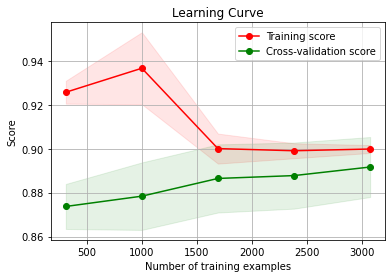

0.9122821748532196


In [43]:
# Train the Logistic Regression model with LogisticRegressionCV()
startTime = time.clock()

cv = 3
y_pred1, logreg = logRegrPredict(X_train, y_train, X_val, cv)   #solver: liblinear

endTime = time.clock()
runTime = endTime - startTime
print('The running time is',runTime,'s')

#print(confusion_matrix(y_val, y_pred1))
print('Accuracy on validation set: ' + str(accuracy_score(y_val,y_pred1)))
print(classification_report(y_val,y_pred1))      
plt = Tool.plot_learning_curve(logreg, X_train, y_train)
plt.show()

In [27]:
# Train the SVM_CV model to find the optimized params
startTime = time.clock()

y_pred2, svmclf_cv = svmPredictCV(X_train, y_train, X_val)
print(accuracy_score(y_val, y_pred2))

endTime = time.clock()
runTime = endTime - startTime
print('The running time is',runTime,'s')

      C  kernel  gamma  degree  Accuracy
0     1  linear    NaN     NaN  0.882031
1    10  linear    NaN     NaN  0.880729
2   100  linear    NaN     NaN  0.880208
3     1     rbf  0.001     NaN  0.888542
4     1     rbf  0.010     NaN  0.819010
5    10     rbf  0.001     NaN  0.877083
6    10     rbf  0.010     NaN  0.815104
7   100     rbf  0.001     NaN  0.864323
8   100     rbf  0.010     NaN  0.815104
9     1    poly    NaN     2.0  0.891927
10    1    poly    NaN     3.0  0.895573
11   10    poly    NaN     2.0  0.892969
12   10    poly    NaN     3.0  0.893750
13  100    poly    NaN     2.0  0.895313
14  100    poly    NaN     3.0  0.887240
Best: 0.895573 using {'C': 1, 'degree': 3, 'kernel': 'poly'}
0.8822916666666667
The running time is 2427.9422684 s


              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       468
         1.0       0.89      0.88      0.88       492

    accuracy                           0.88       960
   macro avg       0.88      0.88      0.88       960
weighted avg       0.88      0.88      0.88       960



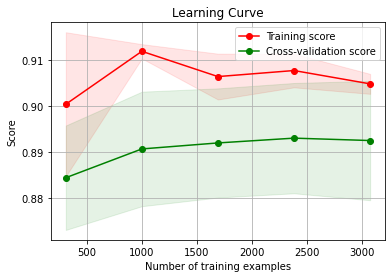

0.9061768305432152


In [28]:
print(classification_report(y_val,y_pred2)) 
plt = Tool.plot_learning_curve(svmclf_cv, X_train, y_train)
plt.show()

In [30]:
# Train the Random Forest model to find optimized params
startTime = time.clock()

y_pred3, rf_cv = RanForCV(X_train, y_train, X_val)
endTime = time.clock()
runTime = endTime - startTime
print('The running time is',runTime,'s')

print(confusion_matrix(y_val, y_pred3))
print(classification_report(y_val,y_pred3)) 

   n_estimators  Accuracy
0            10  0.876563
1            30  0.888802
2            50  0.886458
3           100  0.892708
4           150  0.892188
5           200  0.890625
Best: 0.892708 using {'n_estimators': 100}
The running time is 15.952395400003297 s
[[417  51]
 [ 66 426]]
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       468
         1.0       0.89      0.87      0.88       492

    accuracy                           0.88       960
   macro avg       0.88      0.88      0.88       960
weighted avg       0.88      0.88      0.88       960



NameError: name 'rf_optimized' is not defined

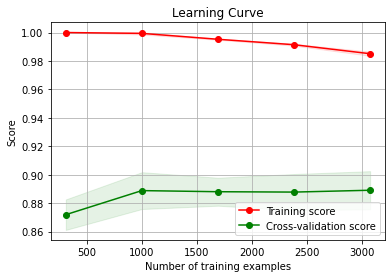

0.994236396873136


In [31]:
plt = Tool.plot_learning_curve(rf_cv, X_train, y_train)
plt.show()

# Model A2: Build LR model with optimized params
## Build SVM model with optimized params
## Build RF model with optimized params

In [12]:
# Model_A2: LR(solver='liblinear', C=0.006)
def model_A2(x_train, x_val, x_test, y_train):    
    A2_lr = LogisticRegression(solver='liblinear', C=0.006)   # default: L2 penalty
    A2_lr.fit(x_train, y_train)
    y_pred_val = A2_lr.predict(x_val)
    y_pred_test = A2_lr.predict(x_test) 

    return y_pred_val, y_pred_test, A2_lr 

In [17]:
# Model_A2_svm: Build the SVM model with the optimized params
def model_A2_svm(x_train, x_val, x_test, y_train):
    A2_svm = svm.SVC(kernel='linear', C=1)
    A2_svm.fit(x_train, y_train)
    y_pred_val2 = A2_svm.predict(x_val)
    y_pred_test2 = A2_svm.predict(x_test)
    
    return y_pred_val2, y_pred_test2, A2_svm 

In [55]:
# Model_A2_rf: Build the RF model with the optimized params
def model_A2_rf(x_train, x_val, x_test, y_train):
    A2_rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='log2', max_depth=10) 
    A2_rf.fit(X_train, y_train)
    y_pred_val3 = A2_rf.predict(x_val)
    y_pred_test3 = A2_rf.predict(x_test)
    
    return y_pred_val3, y_pred_test3, A2_rf

In [14]:
# Build and test the model_A2
y_pred_val, y_pred_test, A2_lr = model_A2(X_train, X_val, X_test, y_train)
print('Accuracy on validation set: ' + str(accuracy_score(y_val,y_pred_val)))
print('Accuracy on test set: ' + str(accuracy_score(y_test,y_pred_test)))
print('For validation set:')
print(classification_report(y_val,y_pred_val))
print('For test set:')
print(classification_report(y_test,y_pred_test))

Accuracy on validation set: 0.878125
Accuracy on test set: 0.9071207430340558
For validation set:
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       468
         1.0       0.89      0.87      0.88       492

    accuracy                           0.88       960
   macro avg       0.88      0.88      0.88       960
weighted avg       0.88      0.88      0.88       960

For test set:
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90       472
         1.0       0.91      0.91      0.91       497

    accuracy                           0.91       969
   macro avg       0.91      0.91      0.91       969
weighted avg       0.91      0.91      0.91       969



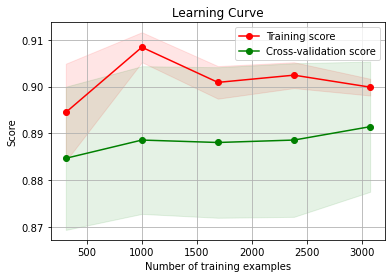

In [17]:
# Plot the learning curve graph
plt = Tool.plot_learning_curve(A2_lr, X_train, y_train)   #For RL
#plt = plot_learning_curve(A2_svm, X_train, y_train)      #For SVM
#plt = plot_learning_curve(A1_rf, X_train, y_train)       #For RF
plt.show()

In [53]:
acc_cv1 = cross_val_score(logreg, X_all, y_smiling, scoring = 'accuracy', cv=5).mean()
print('Accuracy score with 5-cross validation:', acc_cv1)

Accuracy score with 5-cross validation: 0.8904166666666666


In [18]:
try:  
  !jupyter nbconvert --to python A2.ipynb
  # python即转化为.py，script即转化为.html
  # file_name.ipynb即当前module的文件名
except:
  pass

[NbConvertApp] Converting notebook A2.ipynb to python
[NbConvertApp] Writing 6792 bytes to A2.py
